# Linear regression

Linear regression is a very simple supervised machine learning algorithm – we have data (X , Y) with linear relationship. we want to predict unknown Y vales for given X. X can be one or more parameters.

Before we start we need to import some libraries:

In [2]:
import matplotlib.pyplot as py
import seaborn as sb
import pandas as pd
import numpy as np

In this example we will use a dataset from seaborn library (seaborn provides statistics graphs as an extension to matplotlib)

In [3]:
df=sb.load_dataset('tips')

### Data understanding

What are you looking for in this stage?

- Characteristics of the data - size, data types, etc.
- Summery statistics of the dataset.
- Errors and outliers
- Distribution of the feature and label
- Frequencies of categorical features
- Relationships between features and label

Lets look at the data:

In [47]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The dataset contains tips data from different customers females and males smokers and non smokers from days Thursday to Sunday, dinner or lunch and from different tables size

We want to predict how much tip the waiter will earn based on other parameters

First lets look into the data using some dataframe methods :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [41]:
df.describe()
#Note that 50% is the median value 

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [50]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
85,34.83,5.17,Female,No,Thur,Lunch,4
181,23.33,5.65,Male,Yes,Sun,Dinner,2
114,25.71,4.00,Female,No,Sun,Dinner,3
220,12.16,2.20,Male,Yes,Fri,Lunch,2
113,23.95,2.55,Male,No,Sun,Dinner,2


In [36]:
#frequency of categorical variables 

df['smoker'].value_counts()

No     151
Yes     92
Name: smoker, dtype: int64

#### Data analysis
Now lets answer some questions:

What is the hardest day to work ? (based on number of tables been served)

In [51]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


Lets find out what is the best day to work – maximum tips (sum and percents)

In [52]:
df2=df.groupby('day').sum() # sum per day
df2.drop('size',inplace=True,axis=1) # sum of size column is not relevant
df2['percent'] = df2['tip']/df2['total_bill']*100 # add percent column
df2 #print df2

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


We can see that the tips are around 15% of the bill

Now let's see, who eats more (and tips more)? smokers or non smokers?

In [53]:
df3=df.groupby('smoker').sum()
df3['percent'] = df3['tip']/df3['total_bill']*100
df3 #print df3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


Let's group by day and table size:

In [54]:
df4= df.groupby(['day','size']).sum()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4.dropna() # Drop the rows where at least one element is missing.

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

We noticed that: smaller tables are better to serve

#### Data Visualization

It is the most powerful technique for data exploration

Types of Visualization:
- 1-d:
   - Distribution (numeric)
   - Frequency (categorical variables)
- 2-d (relationship):
  - two numeric variables
  - categorical and numerical variables

Lets draw some seaborn graphs:

- Tables per day

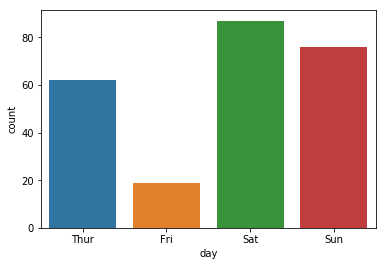

In [28]:
sb.countplot(x='day' ,data=df)

- Tables per day per size:



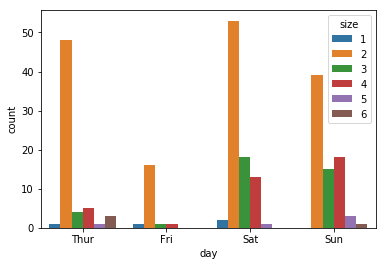

In [29]:
sb.countplot(x='day',hue='size' ,data=df)

- Smokers or not ?

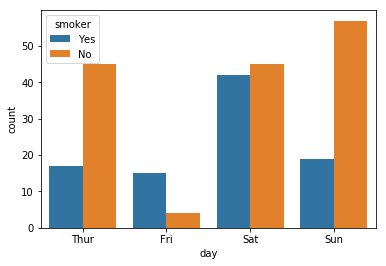

In [30]:
sb.countplot(x='day',hue='smoker' ,data=df)

### Data preperation
Transform and cleanse data 

#### Treat missing values

Missing values are a common problem in data set. Failure to deal with missing values before training a machine learning model will lead to biased training at best, and in many cases actual failure. The Python scikit-learn package will not process arrays with missing values.

There are two problems that must be deal with when treating missing values:

First you must find the missing values. This can be difficult as there is no standard way missing values are coded. Some common possibilities for missing values are:
- Coded by some particular character string, or numeric value like -999.
- A NULL value or numeric missing value such as a NaN.

You must determine how to treat the missing values:
- Remove features with substantial numbers of missing values: 
In many cases, such features are likely to have little information value.
- Remove rows with missing values: 
If there are only a few rows with missing values it might be easier and more certain to simply remove them.
- Impute values: 
Imputation can be done with simple algorithms such as replacing the missing values with the mean or median value. 





In [40]:
#find missing values in a specific column 
pd.isna(df['smoker'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
214    False
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
Name: smoker, Length: 243, dtype: bool

In [39]:
#find any missing value in the data frame
df.isnull().values.any()

False

In [37]:
# if axis == 1 you willl drop a column, if axis==0 you will drop the row that has null value.
df.dropna(axis=1) 
# you can fill the missing value by the mean or the median
df.fillna(df.mean())
df.fillna(df.median())

,total_bill,tip,sex,smoker,day,time,size,is_duplicate
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False
2,21.01,3.50,Male,No,Sun,Dinner,3,False
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
5,25.29,4.71,Male,No,Sun,Dinner,4,False
6,8.77,2.00,Male,No,Sun,Dinner,2,False
7,26.88,3.12,Male,No,Sun,Dinner,4,False
8,15.04,1.96,Male,No,Sun,Dinner,2,False
9,14.78,3.23,Male,No,Sun,Dinner,2,False


#### Remove duplicate rows
Duplicate cases can seriously bias the training of machine learning models. In simple terms, cases which are duplicates add undue weight to that case when training a machine learning model. Therefore, it is necessary to ensure there are no duplicates in the dataset before training a model.

#### Note that: 
In this example it is normal to have dupilated rows, but I would like to show you how to deal with duplicated rows in other datasets.

In [14]:
print(df.shape)
df['is_duplicate']= df.duplicated()
print(df.is_duplicate.unique())

(243, 8)
[False]


In [30]:
df.drop_duplicates(keep = 'first', inplace = True)
print(df.shape)
df.drop(['is_duplicate'], axis=1)

(243, 8)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


#### Transform data
Before we start building our model, we need to convert all the text values into numbers. We can do it in many ways:

- Using replace method
- Using dummy variables

Using replace: 

convert sex and smoker columns to values

df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
df.head()

#### Using dummy variables:

The values in day column are:  Thu, Fri, Sat, Sun we can convert it to 1,2,3,4 but to get a good model, it is better to use boolean variables. We can achieve it by converting the column into 4 columns – one for each day with 0 or 1 as values. In pandas library it can be done using get_dummies:

In [68]:
days=pd.get_dummies(df['day'])
days.sample(5)

,Thur,Fri,Sat,Sun
24,0,0,1,0
220,0,1,0,0
5,0,0,0,1
16,0,0,0,1
228,0,0,1,0


Do the same with time column and concat all data frames, Also we don’t need the day and time columns anymore so we drop them

In [69]:
days=pd.get_dummies(df['day'])
df = pd.concat([df,days],axis=1)
times=pd.get_dummies(df['time'])
df = pd.concat([df,times],axis=1)
df.drop(['day','time'],inplace=True,axis=1)
df.head()

,total_bill,tip,sex,smoker,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,2,0,0,0,1,0,1
1,10.34,1.66,0,0,3,0,0,0,1,0,1
2,21.01,3.50,0,0,3,0,0,0,1,0,1
3,23.68,3.31,0,0,2,0,0,0,1,0,1
4,24.59,3.61,1,0,4,0,0,0,1,0,1


### Building our Machine Learning model
Now we are ready to build the linear regression model:

We create a list of features as X and predicted as Y

In [70]:
X = df[['sex','smoker','size','Thur','Fri','Sat','Sun','Lunch','Dinner']] #features
Y = df[['tip']] #label

Now lets split the data into test and train so we can test our model before we use it – we decide to split 70% – 30%:

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=26)

Now lets train the model with X_train and y_train:

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

And predict the X_test values:

In [73]:
predictions=model.predict(X_test)

We can now look at the predictions and compare it with y_test

We can draw a graph to see the difference distribution:

C:\Users\Eman\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


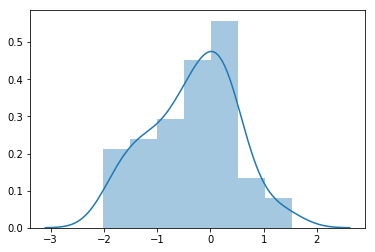

In [74]:
sb.distplot(y_test-predictions)

We can see from the graph that most of the times the predictions were correct. We can continue working on the model , adding data and play with the parameters

If we want to predict new value for example :

We have a 3 size table smoker male on friday lunch:

In [82]:
myvals = np.array([0,1,3,0,1,0,0,1,0]).reshape(1,-1)
model.predict(myvals)

array([[3.14457655]])

We expect to get 3.14$

### Performance Metric

We're predicting a numeric quantity, so this is a regression problem. To measure regression, we'll use a metric called root-mean-squared error. It is an error metric, so lower value is better (as opposed to an accuracy metric, where a higher value is better).

$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$

Where y^ is the predicted value and "y" is the actual value. The best possible score is 0, but the worst possible score can be infinite.

In [135]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

0.7461485445635899